In [1]:
import pandas as pd
import os

In [2]:
labels_category = {0: "plantation", 1: "grassland" , 2: "smallholder_argiculture"}

In [11]:
train_labels_df = pd.read_pickle("intermediate_outputs/train_labels.pickle")

train_labels_df.head()

,label,latitude,longitude,year,example_path,label_names
0,0,-2.051853,111.826093,2001,./data/train_test_data/train/1297.png,plantation
1,2,-1.989349,105.309496,2013,./data/train_test_data/train/1199.png,smallholder_argiculture
2,0,1.223256,100.702217,2014,./data/train_test_data/train/1348.png,plantation
3,0,-2.342948,103.890226,2008,./data/train_test_data/train/2214.png,plantation
4,0,-0.126555,101.758175,2011,./data/train_test_data/train/2220.png,plantation


In [12]:
from collections import Counter
import plotly.express as px

row_labels = train_labels_df.label_names.values
labels = [l for l in row_labels]
counter_labels = Counter(labels)
label_counts_df = pd.DataFrame(
    {"tag": counter_labels.keys(), "total": counter_labels.values()}
).sort_values("total")

fig = px.bar(label_counts_df, x="total", y="tag", orientation="h", 
             color="total",
)
fig.update_layout(title="Class distribution")
fig.show()

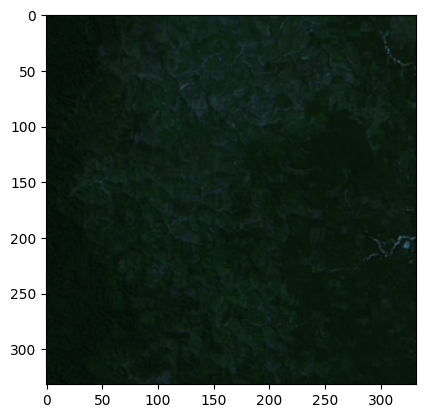

'train_test_data/train/1808.png'

In [10]:
from src.utils import plot_image, bad_files

plot_image(os.path.join(data_path, train_labels_df.example_path[10]))

train_labels_df.example_path[10]

In [7]:
#check if train or test data has corrupted files
bad_files(os.path.join(data_path,"train_test_data/train/"))
bad_files(os.path.join(data_path,"train_test_data/test/"))

100%|██████████| 28/28 [00:00<00:00, 559240.53it/s]


[]

<AxesSubplot: xlabel='year'>

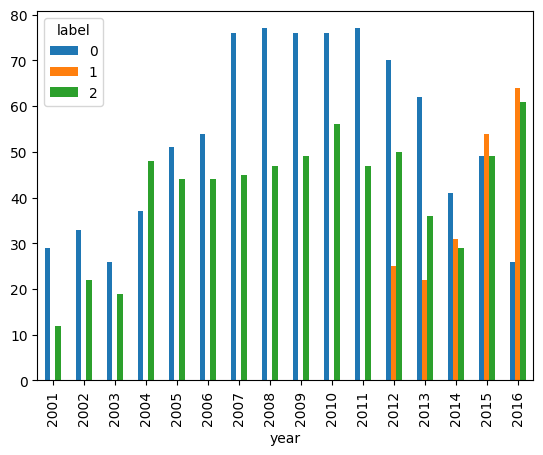

In [16]:
df_year = train_labels_df.groupby(['year', 'label']).size().unstack()
df_year

df_year.plot(kind = 'bar')